In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df=pd.read_csv('train.csv')

In [42]:
df.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,Snack,0.0,No,Urban,24.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,Snack,1.0,No,Metropolitian,33.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,Drinks,1.0,No,Urban,26.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,Buffet,1.0,No,Metropolitian,21.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,Snack,1.0,No,Metropolitian,30.0,6.210138


In [41]:
df.shape

(24585, 17)

In [40]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'distance_km'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24586 entries, 0 to 24585
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           24586 non-null  object 
 1   Delivery_person_ID           24586 non-null  object 
 2   Delivery_person_Age          24586 non-null  object 
 3   Delivery_person_Ratings      24586 non-null  object 
 4   Restaurant_latitude          24586 non-null  float64
 5   Restaurant_longitude         24586 non-null  float64
 6   Delivery_location_latitude   24586 non-null  float64
 7   Delivery_location_longitude  24586 non-null  float64
 8   Order_Date                   24586 non-null  object 
 9   Time_Orderd                  24586 non-null  object 
 10  Time_Order_picked            24586 non-null  object 
 11  Weatherconditions            24586 non-null  object 
 12  Road_traffic_density         24586 non-null  object 
 13  Type_of_order   

In [11]:
df.drop(columns=['ID','Delivery_person_ID'],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24585 entries, 0 to 24584
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          23639 non-null  float64
 1   Delivery_person_Ratings      23606 non-null  float64
 2   Restaurant_latitude          24585 non-null  float64
 3   Restaurant_longitude         24585 non-null  float64
 4   Delivery_location_latitude   24585 non-null  float64
 5   Delivery_location_longitude  24585 non-null  float64
 6   Order_Date                   24585 non-null  object 
 7   Time_Orderd                  24585 non-null  object 
 8   Time_Order_picked            24585 non-null  object 
 9   Weatherconditions            24585 non-null  object 
 10  Road_traffic_density         24585 non-null  object 
 11  Type_of_order                24585 non-null  object 
 12  multiple_deliveries          24072 non-null  float64
 13  Festival             

In [43]:
# Delivery_person_Age -> numeric
if 'Delivery_person_Age' in df.columns:
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(str).str.replace('[^0-9]', '', regex=True)
    df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

# Delivery_person_Ratings -> numeric
if 'Delivery_person_Ratings' in df.columns:
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')



In [44]:
if 'multiple_deliveries' in df.columns:
    df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')


In [45]:

df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

In [46]:
# Ensure the time column name matches
time_col = [col for col in df.columns if "Time_taken" in col][0]  # Finds the correct column
df[time_col] = df[time_col].astype(str).str.extract('(\d+)').astype(float)

In [47]:
# Drop rows with missing target
df.dropna(subset=[time_col], inplace=True)# Drop rows with missing target


In [49]:
# 3. Calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(
    df['Restaurant_latitude'], df['Restaurant_longitude'],
    df['Delivery_location_latitude'], df['Delivery_location_longitude']
)


In [50]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'distance_km'],
      dtype='object')

In [51]:
# Define possible features
possible_features = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km',
    'Weatherconditions', 'Road_traffic_density', 'Type_of_order',
     'Festival', 'City', 'multiple_deliveries'
]

# Keep only those that exist in the dataset
features = [f for f in possible_features if f in df.columns]

X = df[features]
y = df[time_col]


In [52]:
# 5. Preprocessing
numeric_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'multiple_deliveries']
categorical_features = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
                        'Festival', 'City']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

TypeError: list indices must be integers or slices, not str

In [53]:
# 6. Pipeline with RandomForest
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [54]:
# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'distance_km',
                                                   'multiple_deliveries']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order', 'Festival',
                                                   'City'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [60]:
# 11. Predict & evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 3.808670206378259
R² Score: 0.7242198544329367


In [62]:
import matplotlib.pyplot as plt

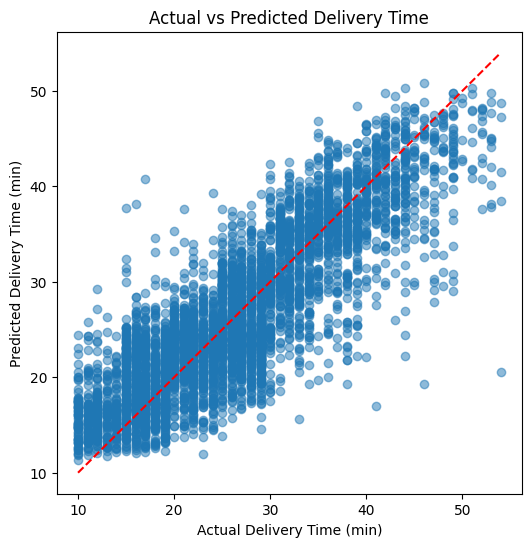

In [63]:
# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Time")
plt.show()

In [65]:
import joblib

In [66]:
# Save the model
joblib.dump(model, "delivery_time_model.joblib")
print("\nModel saved as delivery_time_model.joblib")


Model saved as delivery_time_model.joblib


In [67]:
from google.colab import files
files.download("actual_vs_predicted.png")


FileNotFoundError: Cannot find file: actual_vs_predicted.png